# WeatherPy
----

#### Note
* Using random seed of 42 for fixed results

In [105]:
#importing necessary modules
import concurrent.futures 
import requests
from pprint import pprint
import json
import os
from citipy import citipy
import random
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

%matplotlib inline
plt.style.use('seaborn-whitegrid')

#To get more 500 cities
CITIES_TOT = 1600
SETS_NUM = 150
API_KEY = os.environ.get('API_WEATHER_KEY')



In [64]:
#Setting rnadom seed as 42
#Finding random uniform between -90 and 90 for latitude
#Finding random uniform between -180 and +180 for longitudes
random.seed(42)
ran_lat= [random.uniform(-90,90) for _ in range(CITIES_TOT)]
ran_long = [random.uniform(-180,180) for _ in range(CITIES_TOT)]
#Zipping to create latitude and longitude cordinatis
dd = list(zip(ran_lat,ran_long))
dd

[(25.096823722419074, 158.9785156326945),
 (-85.49806405991995, -124.49006392335727),
 (-40.494722693558536, 57.143834418151556),
 (-49.8220671332119, 79.42779663741828),
 (42.56481854952224, 37.850006830267944),
 (31.80590773612404, 123.31080148082003),
 (70.59232218687217, 22.902492395266478),
 (-74.35101012670509, 117.08505623758754),
 (-14.054072456651326, -169.78554435640405),
 (-84.63650050114734, -163.63375081511688),
 (-50.6451645353514, 50.92334417676963),
 (0.9639518586052276, 27.63764333185648),
 (-85.22352545690455, 54.40679189481594),
 (-54.209222876403274, 96.105240329872),
 (26.97919880031418, -30.02875788123137),
 (8.089466508579008, 50.03682919519338),
 (-50.320688032674596, -0.7062983509982246),
 (16.067823097663563, 45.779043707310365),
 (55.697482202008786, -75.71820355142192),
 (-88.83022325794902, 164.3940611835858),
 (55.04746532990541, -6.139865456849009),
 (35.66509109788083, 109.6877355176639),
 (-28.754907026761465, 66.5967028304436),
 (-62.01369003387932, -7

## Generate Cities List

In [65]:
#Using the 'citypy' module to generate the cities.
cities = []
def generate_cities(lat):
    for rows in lat:
        city = citipy.nearest_city(rows[0],rows[1])
        cities.append(city.city_name)

generate_cities(dd)

#Using python set eliminate any repeating coordinates 
final_cities = list(set(cities))
final_cities_clean = [final_cities[i:i+SETS_NUM] for i in range(0, len(final_cities), SETS_NUM)]
len(final_cities_clean)

5

### Perform API Calls
* Performed a weather check on each city using a series of successive API calls.
* Included a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
#using a empty list hold the json output of api requested data
json_data = []
print("""Beginning Data Retrieval     
---------------------------------------""")
def get_weather_data(cities,set_num):
    
    URL = "https://api.openweathermap.org/data/2.5/weather?"
    #using enumerate to keep count
    for enum,city in enumerate(cities,start=1):  
        parameters = {
            'q' : city,
            'appid' : API_KEY,
            'units' : "imperial"
            

        }
        #try,except,finally allows us to eliminate any errors
        try:           
            data_request = requests.get(URL,params =parameters ).json()
            print(f"Processing Record {enum} of {set_num}| {data_request['name']}")            
        except:
            print("City not found. Skipping...")
        finally:
            json_data.append(data_request)

    
#using for loop to generate city info json    
for n in range(len(final_cities_clean)):
    get_weather_data(final_cities_clean[n],n+1)
    time.sleep(0.10)        

 
print("""-----------------------------
Data Retrieval Complete      
-----------------------------""")



Beginning Data Retrieval     
---------------------------------------
Processing Record 1 of 1| Biak
Processing Record 2 of 1| Boddam
Processing Record 3 of 1| Alberton
Processing Record 4 of 1| Fes
Processing Record 5 of 1| Sørland
Processing Record 6 of 1| Flinders
Processing Record 7 of 1| Cape Town
Processing Record 8 of 1| Calderitas
Processing Record 9 of 1| Slatyne
Processing Record 10 of 1| Papara
Processing Record 11 of 1| Warrnambool
Processing Record 12 of 1| Guerrero Negro
Processing Record 13 of 1| Boa Vista
Processing Record 14 of 1| Bud
Processing Record 15 of 1| Yagodnoye
Processing Record 16 of 1| Konëvo
Processing Record 17 of 1| Makhachkala
Processing Record 18 of 1| Totness
Processing Record 19 of 1| Mount Gambier
Processing Record 20 of 1| Pitimbu
Processing Record 21 of 1| Roura
Processing Record 22 of 1| Burnie
Processing Record 23 of 1| Maceió
Processing Record 24 of 1| Ellisras
Processing Record 25 of 1| Port Augusta
Processing Record 26 of 1| Hirara
Processing

Processing Record 78 of 2| Zapolyarnyy
City not found. Skipping...
Processing Record 80 of 2| Itaobim
Processing Record 81 of 2| Punta Arenas
Processing Record 82 of 2| Rivadavia
Processing Record 83 of 2| Morón
Processing Record 84 of 2| The Valley
Processing Record 85 of 2| Kidal
Processing Record 86 of 2| Kavieng
Processing Record 87 of 2| Hibbing
Processing Record 88 of 2| Busselton
Processing Record 89 of 2| Las Palmas
Processing Record 90 of 2| Río Gallegos
Processing Record 91 of 2| Jūnāgarh
Processing Record 92 of 2| Inírida
Processing Record 93 of 2| Thompson
Processing Record 94 of 2| Morristown
Processing Record 95 of 2| Xiongyue
City not found. Skipping...
Processing Record 97 of 2| Schisma Eloundas
Processing Record 98 of 2| Cascais
Processing Record 99 of 2| Evensk
Processing Record 100 of 2| New Norfolk
Processing Record 101 of 2| Mataura
Processing Record 102 of 2| Bathsheba
Processing Record 103 of 2| Cidreira
Processing Record 104 of 2| Acapulco de Juárez
City not fou

Processing Record 8 of 4| Nacala
Processing Record 9 of 4| Harper
Processing Record 10 of 4| Alofi
Processing Record 11 of 4| Kurunegala
Processing Record 12 of 4| Khovu-Aksy
Processing Record 13 of 4| Aykhal
Processing Record 14 of 4| Bhuj
Processing Record 15 of 4| Ponta do Sol
Processing Record 16 of 4| Atuona
City not found. Skipping...
Processing Record 18 of 4| Port Hardy
Processing Record 19 of 4| George Town
City not found. Skipping...
Processing Record 21 of 4| Baisha
Processing Record 22 of 4| Cockburn Town
Processing Record 23 of 4| Kulgam
Processing Record 24 of 4| Yangi Marg`ilon
Processing Record 25 of 4| Xinmin
Processing Record 26 of 4| Atasū
Processing Record 27 of 4| Hearst
Processing Record 28 of 4| Necochea
Processing Record 29 of 4| Kruisfontein
Processing Record 30 of 4| Sohag
Processing Record 31 of 4| North Battleford
Processing Record 32 of 4| Itaqui
Processing Record 33 of 4| Maniitsoq
Processing Record 34 of 4| Thinadhoo
Processing Record 35 of 4| Riedlingen


### Convert Raw Data to DataFrame
* Exported the city data into a .csv.
* Display the DataFrame

In [67]:
#Creating empty list for the dataframe
city_name = []
latitude = []
longitude =  []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
for data in json_data:
    #using try,except to ellinate any errors
    try:
        city_name.append(data['name'])
        latitude.append(data['coord']['lat'])
        longitude.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
    except:
        pass
    

#attaching afformentioned list to create dataframe   
df = pd.DataFrame({
    'City':city_name,
    'Lat':latitude,
    'Lng':longitude,
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':date
})


#sorting the dataframe
df.sort_values(by = 'City',ascending = True,inplace = True)
df.drop_duplicates(inplace=True)
#restting the index
df.reset_index(drop = True,inplace = True)
df = df.dropna()

#Exporting to CSV
df.to_csv("../output_data/weather.csv",encoding='utf-8',index=False)

In [68]:
#To get overall info of df
df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,21.245922,17.647696,59.361809,73.981229,52.556314,7.669078,1.603066e+09
std,32.918620,88.145868,19.955241,20.688194,37.808710,5.231884,1.026583e+02
min,-54.800000,-175.200000,6.690000,7.000000,0.000000,0.220000,1.603066e+09
25%,-3.770000,-62.002500,43.120000,65.000000,16.000000,3.717500,1.603066e+09
50%,25.435000,21.885000,63.860000,79.000000,60.000000,6.710000,1.603066e+09
75%,49.755000,90.362500,76.022500,90.000000,90.000000,10.290000,1.603066e+09
max,78.220000,179.320000,102.000000,100.000000,100.000000,33.170000,1.603066e+09


## Inspect the data and remove the cities where the humidity > 100%.
----


In [69]:
#  Get the indices of cities that have humidity over 100%.
df_copy = df.copy()
df_humidity_100 = df_copy.loc[df['Humidity']>=100]
df_humidity_100.index

Int64Index([76, 93, 210, 259, 332, 386, 398, 461, 462, 467, 576, 585], dtype='int64')

In [70]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df_copy.drop(axis=0, index=df_humidity_100.index,inplace=False)
clean_city_data.reset_index(drop = True,inplace = True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Abbeville,50.10,1.83,48.99,99,100,3.74,FR,1603066137
1,Abu Dhabi,24.47,54.37,75.20,41,0,2.24,AE,1603066006
2,Abu Samrah,35.30,37.18,59.68,64,44,3.80,SY,1603066021
3,Acapulco de Juárez,16.86,-99.89,86.00,79,75,8.05,MX,1603066032
4,Acarí,-15.43,-74.62,63.37,68,27,4.61,PE,1603066141
...,...,...,...,...,...,...,...,...,...
569,Zhaodong,46.08,125.98,42.01,69,0,8.95,CN,1603066075
570,Zhezkazgan,47.80,67.71,41.59,60,0,8.28,KZ,1603066016
571,Zhigansk,66.77,123.37,8.53,91,72,4.99,RU,1603066086
572,Znamenskoye,57.13,73.83,31.69,94,81,7.09,RU,1603066137


In [71]:
#Checking if there is any repeated cities
clean_city_data['City'].value_counts()

Srandakan     1
Beloha        1
Rājsamand     1
Muros         1
Viesca        1
             ..
Avera         1
Rikitea       1
Strezhevoy    1
Pontianak     1
Hithadhoo     1
Name: City, Length: 574, dtype: int64

## Plotting the Data

* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

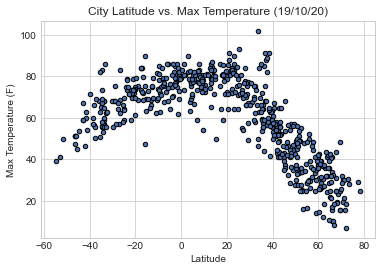

In [153]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Max Temp',edgecolors='black')
plt.title("City Latitude vs. Max Temperature (19/10/20)")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.savefig("../output_data/fig1.png")
plt.show()

Observation:
In the above figure at equitorial(Latitiude 0 degrees) Temperature is really high.And the temperatur increases toward higher latitudes,as earth is tiltled at an angle approx 23.5 degrees where higher latitude are closer to sun and lower latitudes are away from the sun based on the year. 

## Latitude vs. Humidity Plot

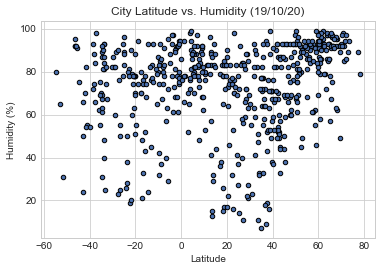

In [109]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Humidity',edgecolor='black' )
plt.title("City Latitude vs. Humidity (19/10/20)")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.show()


Observation:
In the above figure Humidity varies as change in latitude.Areas near the equator have much higher specific humidity than areas farther north and south (toward the poles)

## Latitude vs. Cloudiness Plot

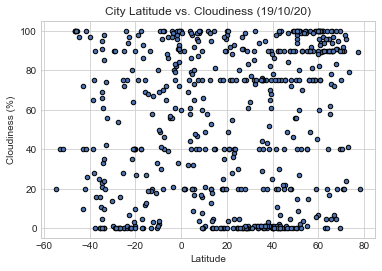

In [112]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Cloudiness',edgecolor='black' )
plt.title("City Latitude vs. Cloudiness (19/10/20)")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.show()

Observation:
In the above figure cloudiness is high in equitorial region,close to ocean. As cloudiness is proportional to tempearture. And cloudiness is very low as we move towards the pole regions.

## Latitude vs. Wind Speed Plot

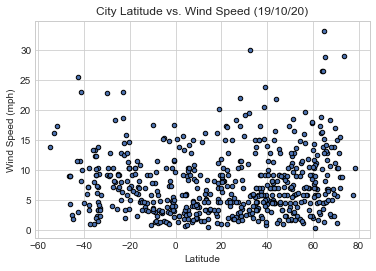

In [142]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Wind Speed',edgecolor='black' )
plt.title("City Latitude vs. Wind Speed (19/10/20)")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.show()

Observation:
In the above figure wind speed is lower in equitorial region. And much higher as we move towards the pole regions.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

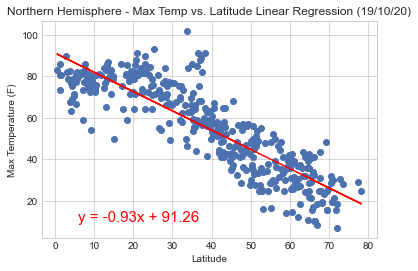

R value is: 0.7610864857554108


In [143]:
north_hem = clean_city_data.copy()
north_hem = north_hem.loc[north_hem['Lat'] > 0]
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Max Temp',edgecolor='black')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (19/10/20)")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()
print(f"R value is: {rvalue**2}")

Observation:
In the above figure  as we move from equitorial  towards the north pole the temperature drops. Thus show showing negative slope.With R squared value is 76% has medium co-relation between Latitude and Max Temp. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

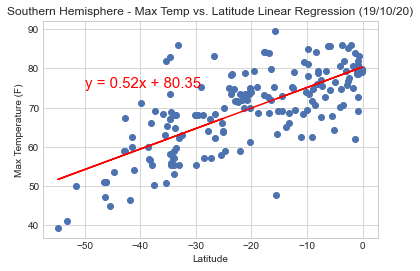

R value is: 0.4974639232234123


In [144]:
south_hem = clean_city_data.copy()
south_hem = south_hem.loc[south_hem['Lat'] < 0]
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Max Temp',edgecolor='black')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (19/10/20)")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,75),fontsize=15,color="red")
plt.show()
print(f"R value is: {rvalue**2}")

Observation:
In the above figure  as we move from south pole  towards the equitorial the temperature rises. Thus show showing positive slope.The co-relation is low in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

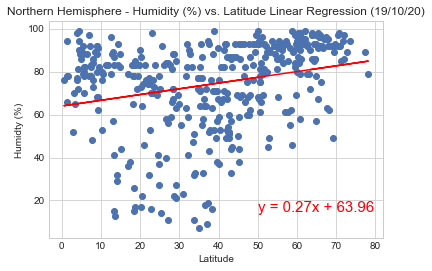

R value is: 0.0671186491237572


In [145]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Humidity',edgecolor='black')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (19/10/20)")
plt.ylabel('Humidty (%)')
plt.xlabel('Latitude')
x_values = north_hem['Lat']
y_values = north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.show()
print(f"R value is: {rvalue**2}")

Observation:
In the above figure  as we move from equitorial  towards the north pole the humidity is high. Also we can observer low humidty at certain regions this is due altitude from sea-level. At higher altitude,the temperature decreases and humidty decreases subsequently.The co-relation factor is very-low to show a fixed relationship. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

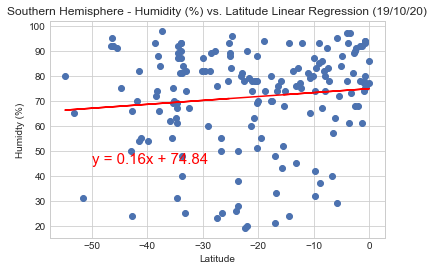

R value is: 0.012224497266596619


In [146]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Humidity',edgecolor='black')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (19/10/20)")
plt.ylabel('Humidty (%)')
plt.xlabel('Latitude')
x_values = south_hem['Lat']
y_values = south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")
plt.show()
print(f"R value is: {rvalue**2}")

Observation:
In the above figure  as we move from south pole  towards the equitorial we can find similar trend as norther hemishpere. The co-relation factor is very-low to show a fixed relationship. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

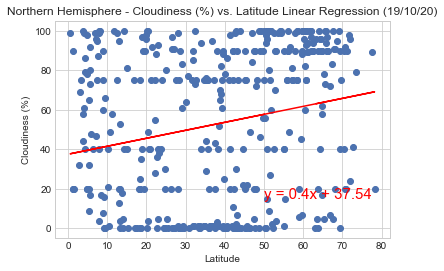

R value is: 0.04509639710507247


In [147]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Cloudiness',edgecolor='black')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (19/10/20)")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.show()
print(f"R value is: {rvalue**2}")

Observation:
In the above figure  majority of the cloudiness lies between 10 to 60 degrees.Since the co-relation is weak it is a noa a good measure cloudiness between Latitude and Cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

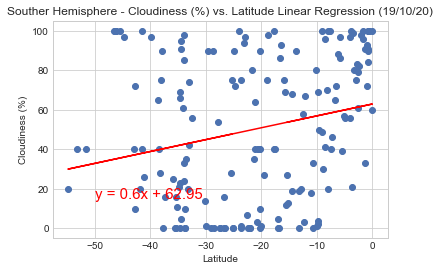

R value is: 0.05262279450591537


In [148]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Cloudiness',edgecolor='black')
plt.title("Souther Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (19/10/20)")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.show()
print(f"R value is: {rvalue**2}")

Observation:
In the above figure  majority of the cloudiness lies between -40 to 0 degrees for southern hemishere.Since the co-relation is weak it is a noa a good measure cloudiness between Latitude and Cloudiness in souther hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

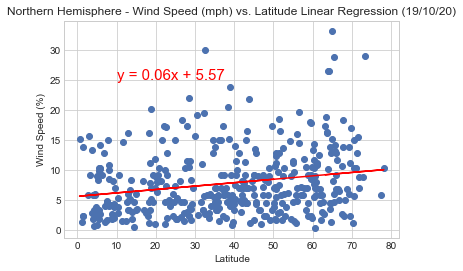

R value is: 0.04475160045184983


In [151]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Wind Speed',edgecolor='black')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (19/10/20)")
plt.ylabel('Wind Speed (%)')
plt.xlabel('Latitude')
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.show()
print(f"R value is: {rvalue**2}")

Observation:
In the above figure  majority of the cloudiness lies between -40 to 0 degrees for southern hemishere.Since the co-relation is weak it is a noa a good measure cloudiness between Latitude and Cloudiness in souther hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

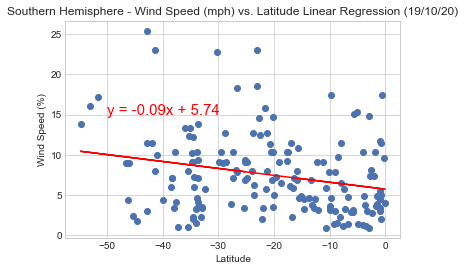

R value is: 0.060935688726519624


In [150]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Wind Speed',edgecolor='black')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (19/10/20)")
plt.ylabel('Wind Speed (%)')
plt.xlabel('Latitude')
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.show()
print(f"R value is: {rvalue**2}")